In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as na

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv('E:/Data Analytics/workshop/ABD vs Bumrah-20220218T052448Z-001/ABD vs Bumrah/IPL_ball_by_ball_updated.csv')

In [3]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [5]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [6]:
df.innings.unique()
len(df)

207880

In [7]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [8]:
#AB de Villiers
#JJ Bumrah
df = df[(df.wides != 1.)]
df = df[(df.wides != 2.)]
df = df[(df.wides != 3.)]
df = df[(df.wides != 5.)]
len(df)

201568

In [39]:
Req_df = df[(df.striker == 'AB de Villiers') & (df.bowler == 'JJ Bumrah')]


Req_df.head()

Runs_Scored =sum(Req_df.runs_off_bat)

Balls_Faced = len(Req_df)

Strike_Rate =100* sum(Req_df.runs_off_bat)/len(Req_df)

Runs_Scored, Balls_Faced, Strike_Rate

Dimissal = len(Req_df[Req_df.player_dismissed == 'AB de Villiers'])

ABd_Against_Bumrah = pd.DataFrame({'Player Name': ['AB De Villers'],'Runs Scored' :[Runs_Scored], 'Balls Faced' : [Balls_Faced], 'Strike Rate' : [Strike_Rate], 'Bowler' : ['Bumrah'], 'No. of Dismissals':[Dimissal]})

ABd_Against_Bumrah

,Player Name,Runs Scored,Balls Faced,Strike Rate,Bowler,No. of Dismissals
0,AB De Villers,125,85,147.058824,Bumrah,3


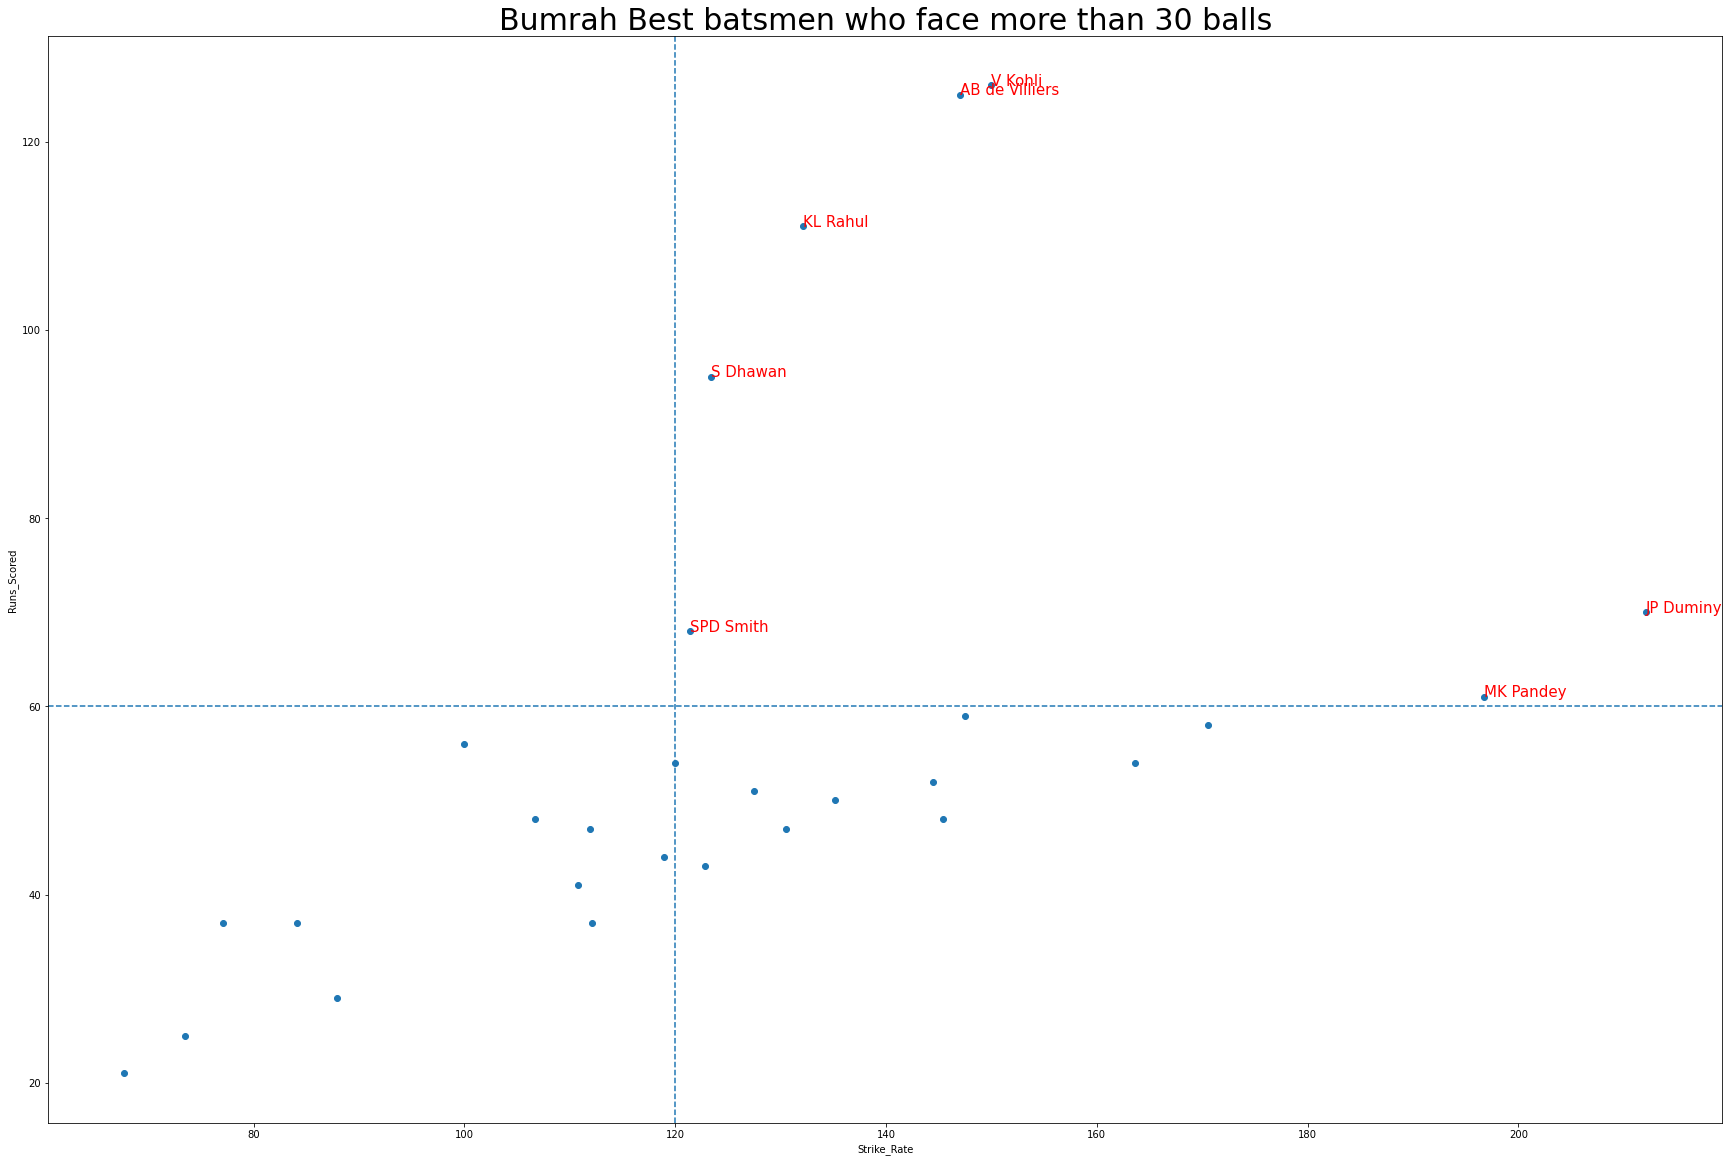

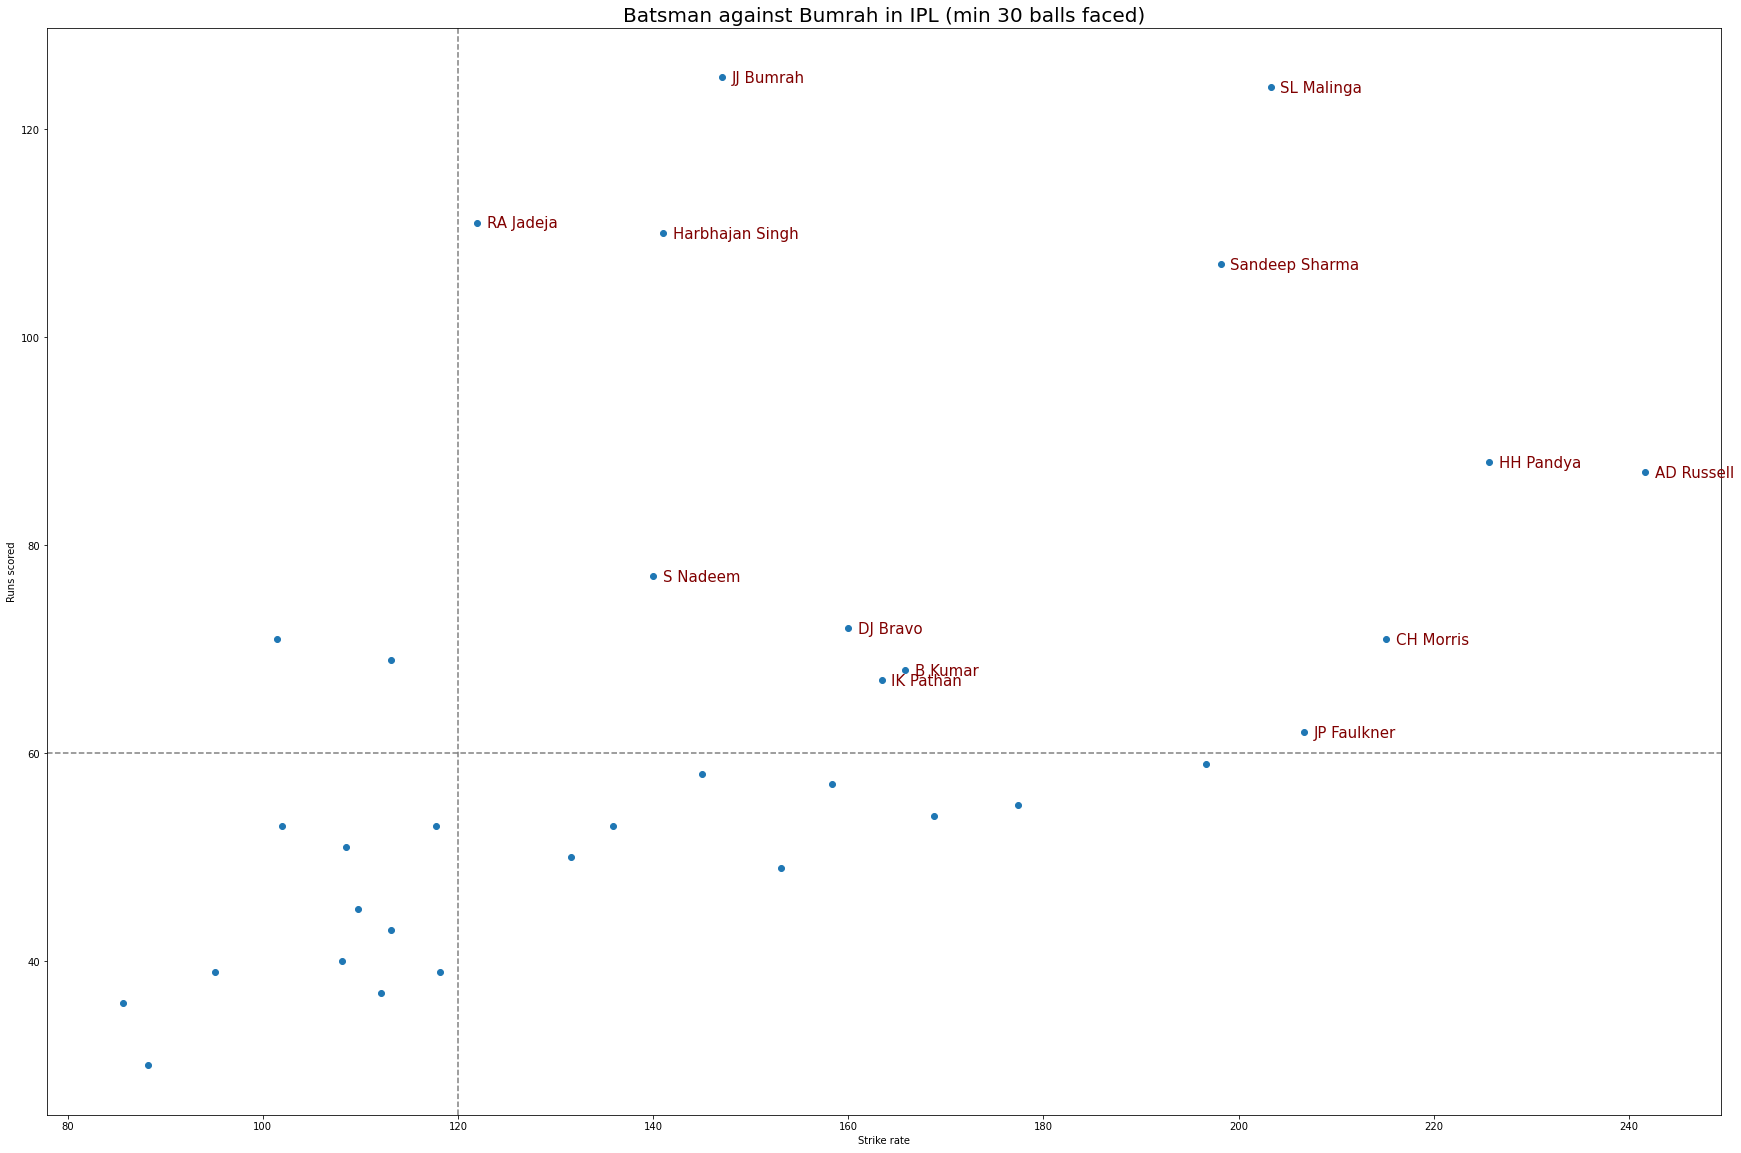

In [37]:
Bumrah_df = df[df.bowler == 'JJ Bumrah']



Bdf1 = pd.DataFrame(Bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

Bdf2 = pd.DataFrame(Bumrah_df.groupby('striker')['ball'].count()).reset_index()



Bdf3 = Bdf1.merge(Bdf2, on = 'striker', how='left')

Bdf3['Strike_Rate'] = 100*(Bdf3.runs_off_bat/Bdf3.ball)

Bdf4 =Bdf3.sort_values(by = ['runs_off_bat'] , ascending=False) 



Bumrah_Best_batsmen = Bdf4[Bdf4.ball >= 30]

Bumrah_Best_batsmen.reset_index(inplace = True, drop = True)

Bumrah_Best_batsmen

plt.figure(figsize = (30,20))
plt.scatter(Bumrah_Best_batsmen.Strike_Rate , Bumrah_Best_batsmen.runs_off_bat)
for i in range (len(Bumrah_Best_batsmen)):
    if Bumrah_Best_batsmen.Strike_Rate[i] > 120:
        if Bumrah_Best_batsmen.runs_off_bat[i] > 60 :
            plt.text(Bumrah_Best_batsmen.Strike_Rate[i] , Bumrah_Best_batsmen.runs_off_bat[i], Bumrah_Best_batsmen.striker[i] , color='Red' , fontsize = 15)

plt.title('Bumrah Best batsmen who face more than 30 balls' , fontsize=30)
plt.axvline(120 , ls= '--')
plt.axhline(60 , ls='--')
plt.xlabel('Strike_Rate')
plt.ylabel('Runs_Scored')
plt.show()


ABd_Against_Bumrah

Abd_df = df[df.striker == 'AB de Villiers']

Abddf1 = pd.DataFrame(Abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

Abddf2 = pd.DataFrame(Abd_df.groupby('bowler')['ball'].count()).reset_index()

Abddf3 = Abddf1.merge(Abddf2, on ='bowler', how='left')

Abddf3['Strike_rate'] = 100*(Abddf3.runs_off_bat/Abddf3.ball)

Abddf4 = Abddf3.sort_values(by = 'runs_off_bat' , ascending=False)

Abd_Fav_bowler = Abddf4[Abddf4.ball >= 30]

Abd_Fav_bowler.reset_index(inplace = True, drop = True)

Abd_Fav_bowler.to_csv('Abd_fav_bolwers')

plt.figure(figsize = (30,20))
plt.scatter(Abd_Fav_bowler.Strike_rate,Abd_Fav_bowler.runs_off_bat)

for i in range(len(Abd_Fav_bowler)):
    if Abd_Fav_bowler.Strike_rate[i] >= 120:
        if Abd_Fav_bowler.runs_off_bat[i] >= 60:
            plt.text(Abd_Fav_bowler.Strike_rate[i] + 1,Abd_Fav_bowler.runs_off_bat[i] - 0.5, Abd_Fav_bowler.bowler[i] , color ='maroon' , fontsize = 15)
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title('Batsman against Bumrah in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()
